## Summary Statistics

------

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Set up the graph basics
plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
# Import the original data files
df = pd.read_csv('../data/2017_diabetes_cleaned.csv')

--------

#### General Condition

In [3]:
df

,diabete,bmi,physhlth,menthlth,michd,hchol,hblpr,vpa,hvdr,smok,incom50,cllgr,sex,age65
0,1,26.96,0.0,0.0,0,1,1,180.0,0,0,0,1,1,1
1,0,29.43,0.0,0.0,0,0,1,0.0,0,0,1,1,0,1
2,0,27.34,6.0,0.0,1,0,1,60.0,0,1,0,0,0,1
3,0,27.12,2.0,1.0,0,0,1,0.0,0,0,0,0,0,0
4,1,23.03,5.0,0.0,0,1,1,125.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211505,1,32.45,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1
211506,0,24.80,0.0,0.0,0,0,0,0.0,0,0,1,0,1,0
211507,0,25.77,0.0,0.0,0,0,0,90.0,0,0,1,1,0,0
211508,0,22.86,0.0,0.0,0,0,0,0.0,0,0,0,1,1,0


##### After variable selection and data cleaning, we have got 211510 complete and clean samples in the dataset, with 18 variables.

--------

#### Remove Outliers and Invalid Values

In [4]:
# The independent variable, vpa, numerical
df['vpa'].describe()

count    211510.00000
mean        136.26750
std         350.91621
min           0.00000
25%           0.00000
50%           0.00000
75%         150.00000
max       37500.00000
Name: vpa, dtype: float64

In [5]:
# Independent variable vpa represnts Minutes of total Vigorous Physical Activity per week
# The unit is minutes/week
# A value which is > 8hr * 7days * 60 minutes = 3360 minutes/week seems unreasonable or invalid
df=df[df['vpa'] <= 3360]
df['vpa'].describe()

count    211319.000000
mean        131.509618
std         282.643968
min           0.000000
25%           0.000000
50%           0.000000
75%         150.000000
max        3360.000000
Name: vpa, dtype: float64

In [6]:
df

,diabete,bmi,physhlth,menthlth,michd,hchol,hblpr,vpa,hvdr,smok,incom50,cllgr,sex,age65
0,1,26.96,0.0,0.0,0,1,1,180.0,0,0,0,1,1,1
1,0,29.43,0.0,0.0,0,0,1,0.0,0,0,1,1,0,1
2,0,27.34,6.0,0.0,1,0,1,60.0,0,1,0,0,0,1
3,0,27.12,2.0,1.0,0,0,1,0.0,0,0,0,0,0,0
4,1,23.03,5.0,0.0,0,1,1,125.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211505,1,32.45,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1
211506,0,24.80,0.0,0.0,0,0,0,0.0,0,0,1,0,1,0
211507,0,25.77,0.0,0.0,0,0,0,90.0,0,0,1,1,0,0
211508,0,22.86,0.0,0.0,0,0,0,0.0,0,0,0,1,1,0


##### After excluding potential invalid values, we have got 211319 complete and clean samples in the dataset, with 18 variables.

In [7]:
## save to CSV
df.to_csv('../data/2017_diabetes_cleaned_vld.csv', index = False)

-----------------------------

#### Check the Basic Statistics for 18 Selected Variables 

In [8]:
# The dependent variable, diabete, categorical
df['diabete'].describe()

count    211319.000000
mean          0.140853
std           0.347871
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabete, dtype: float64

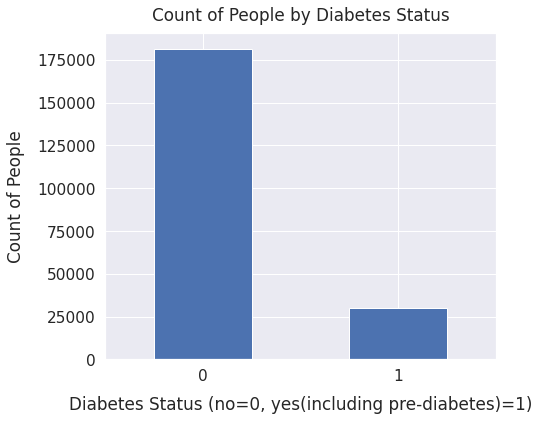

In [9]:
# the distribution of diabete
sns.set(font_scale=1.4)
df['diabete'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Diabetes Status (no=0, yes(including pre-diabetes)=1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Diabetes Status', y=1.02);

In [10]:
# The independent variable, bmi, numerical
df['bmi'].describe()

count    211319.000000
mean         27.898930
std           5.805848
min          12.010000
25%          23.960000
50%          26.970000
75%          30.810000
max          96.610000
Name: bmi, dtype: float64

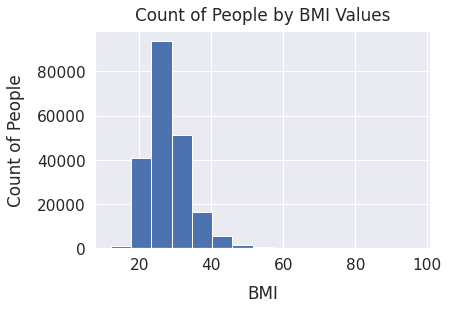

In [11]:
# the distribution of bmi
plt.hist(df['bmi'], bins=15)
plt.xlabel('BMI', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by BMI Values', y=1.02);
plt.show()

In [12]:
# The independent variable, physhlth, numerical
df['physhlth'].describe()

count    211319.000000
mean          3.268248
std           7.484756
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: physhlth, dtype: float64

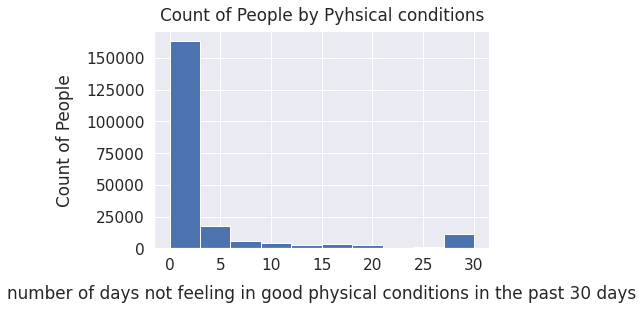

In [13]:
# the distribution of physhlth
plt.hist(df['physhlth'], bins=10)
plt.xlabel('number of days not feeling in good physical conditions in the past 30 days', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Pyhsical conditions', y=1.02);
plt.show()

In [14]:
# The independent variable, menthlth, numerical
df['menthlth'].describe()

count    211319.000000
mean          2.929576
std           6.933168
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: menthlth, dtype: float64

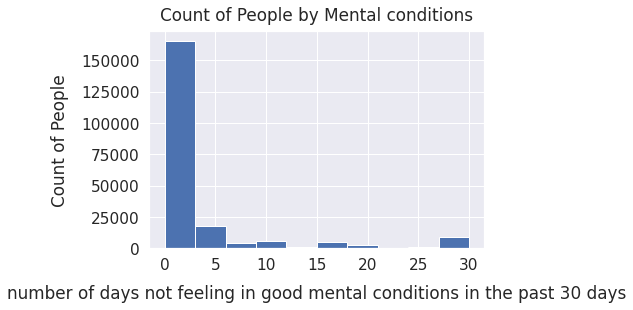

In [15]:
# the distribution of menthlth
plt.hist(df['menthlth'], bins=10)
plt.xlabel('number of days not feeling in good mental conditions in the past 30 days', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Mental conditions', y=1.02);
plt.show()

In [16]:
# The independent variable, michd, categorical
df['michd'].describe()

count    211319.000000
mean          0.077731
std           0.267748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: michd, dtype: float64

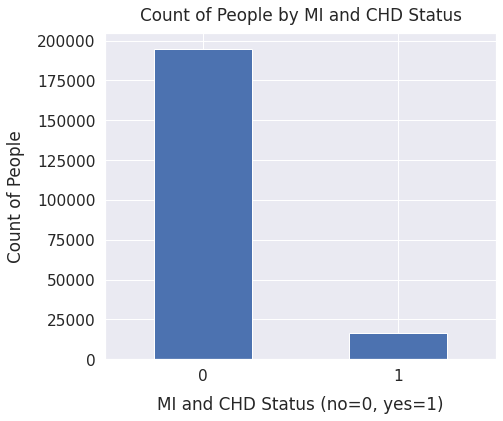

In [17]:
# the distribution of michd
sns.set(font_scale=1.4)
df['michd'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('MI and CHD Status (no=0, yes=1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by MI and CHD Status', y=1.02);

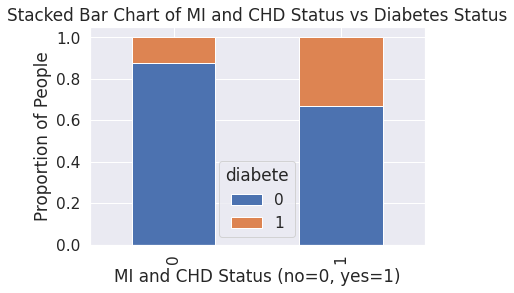

In [18]:
# Stacked Bar Chart of CHD and MI Status vs Diabetes Status
table=pd.crosstab(df.michd,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of MI and CHD Status vs Diabetes Status')
plt.xlabel('MI and CHD Status (no=0, yes=1)')
plt.ylabel('Proportion of People')
plt.show()

In [19]:
# The independent variable, hchol, categorical
df['hchol'].describe()

count    211319.000000
mean          0.373805
std           0.483814
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: hchol, dtype: float64

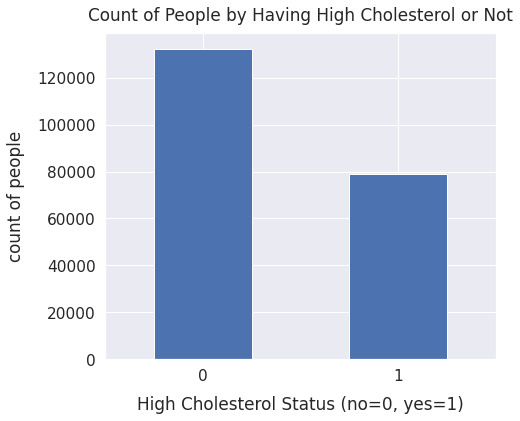

In [20]:
# the distribution of hchol
df['hchol'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('High Cholesterol Status (no=0, yes=1)', labelpad=12)
plt.ylabel('count of people', labelpad=12)
plt.title('Count of People by Having High Cholesterol or Not', y=1.02);

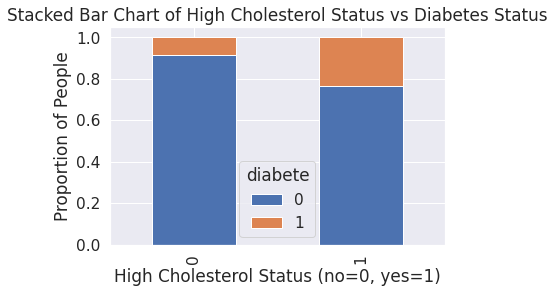

In [21]:
# Stacked Bar Chart of High Cholesterol Status vs Diabetes Status
table=pd.crosstab(df.hchol,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of High Cholesterol Status vs Diabetes Status')
plt.xlabel('High Cholesterol Status (no=0, yes=1)')
plt.ylabel('Proportion of People')
plt.show()

In [22]:
# The independent variable, hblpr, categorical
df['hblpr'].describe()

count    211319.000000
mean          0.388446
std           0.487398
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: hblpr, dtype: float64

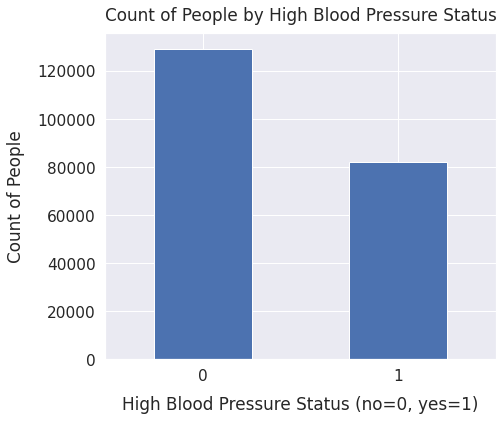

In [23]:
# the distribution of hblpr
df['hblpr'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('High Blood Pressure Status (no=0, yes=1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by High Blood Pressure Status', y=1.02);

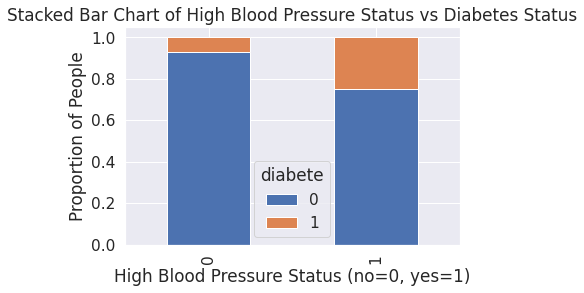

In [24]:
# Stacked Bar Chart of High Blood Pressure Status vs Diabetes Status
table=pd.crosstab(df.hblpr,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of High Blood Pressure Status vs Diabetes Status')
plt.xlabel('High Blood Pressure Status (no=0, yes=1)')
plt.ylabel('Proportion of People')
plt.show()

In [25]:
# The independent variable, vpa, numerical
df['vpa'].describe()

count    211319.000000
mean        131.509618
std         282.643968
min           0.000000
25%           0.000000
50%           0.000000
75%         150.000000
max        3360.000000
Name: vpa, dtype: float64

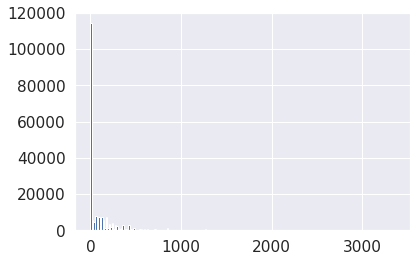

In [26]:
# the distribution of vpa
plt.hist(df[df['vpa'] <= .15e7]['vpa'], bins =200)
plt.show()

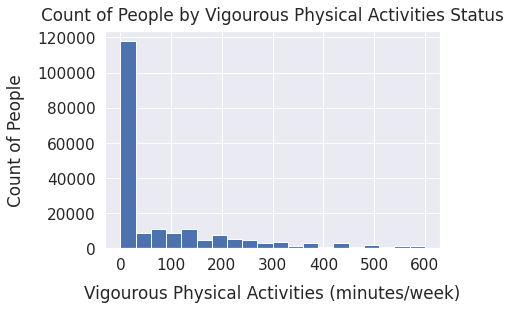

In [27]:
# Since the simple histogtam could not show the distribution of vpa clearly,
# we perform the histogram for data up to 95th quantile of vpa reported 
vpa_quant_95 = df['vpa'].quantile(.95)
plt.hist(df[df['vpa'] <= vpa_quant_95]['vpa'], bins=20)
plt.xlabel('Vigourous Physical Activities (minutes/week)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title("Count of People by Vigourous Physical Activities Status", y=1.02);
plt.show()

In [28]:
# The independent variable, hvdr, categorical
df['hvdr'].describe()

count    211319.000000
mean          0.062938
std           0.242852
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hvdr, dtype: float64

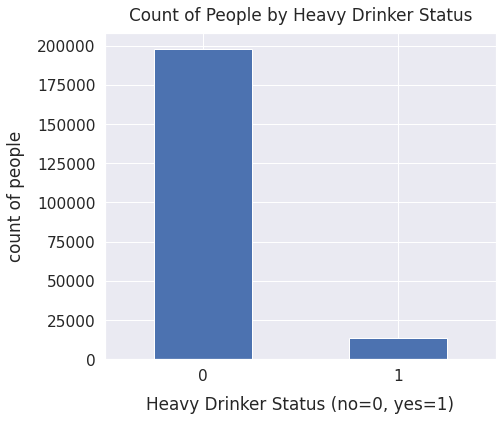

In [29]:
# the distribution of hvdr
df['hvdr'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Heavy Drinker Status (no=0, yes=1)', labelpad=12)
plt.ylabel("count of people", labelpad=12)
plt.title("Count of People by Heavy Drinker Status", y=1.02);

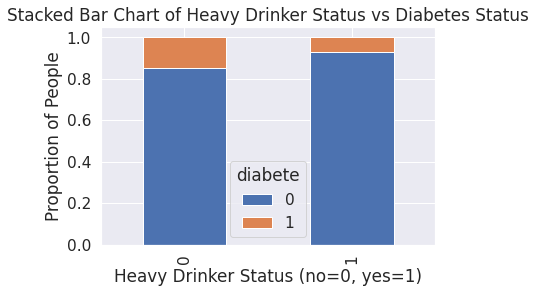

In [30]:
# Stacked Bar Chart of Heavy Drinker Status vs Diabetes Status
table=pd.crosstab(df.hvdr,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Heavy Drinker Status vs Diabetes Status')
plt.xlabel('Heavy Drinker Status (no=0, yes=1)')
plt.ylabel('Proportion of People')
plt.show()

In [31]:
# The independent variable, smok, categorical
df['smok'].describe()

count    211319.000000
mean          0.118508
std           0.323209
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: smok, dtype: float64

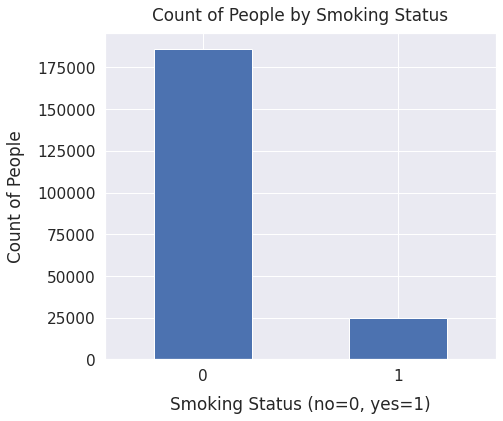

In [32]:
# the distribution of smok
df['smok'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Smoking Status (no=0, yes=1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Smoking Status', y=1.02);

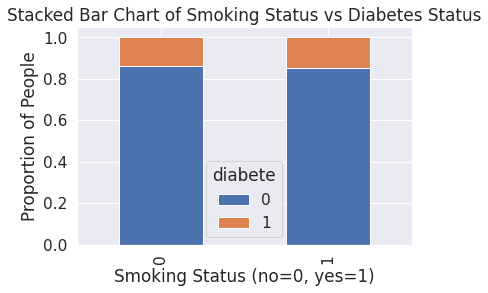

In [33]:
# Stacked Bar Chart of Smoking Status vs Diabetes Status
table=pd.crosstab(df.smok,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Smoking Status vs Diabetes Status')
plt.xlabel('Smoking Status (no=0, yes=1)')
plt.ylabel('Proportion of People')
plt.show()

In [34]:
# The independent variable, incom50, categorical
df['incom50'].describe()

count    211319.000000
mean          0.570848
std           0.494956
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: incom50, dtype: float64

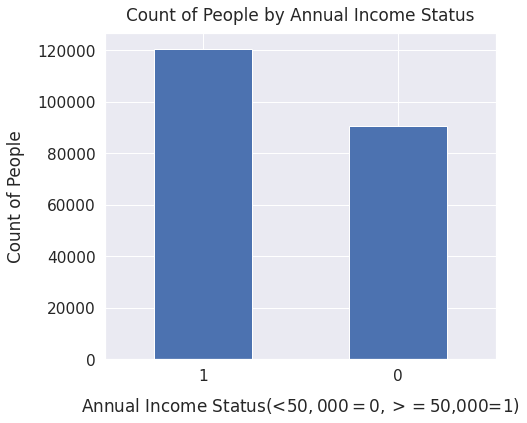

In [35]:
# the distribution of incom50
df['incom50'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Annual Income Status(<$50,000=0, >=$50,000=1)', labelpad=12)
plt.ylabel("Count of People", labelpad=12)
plt.title("Count of People by Annual Income Status", y=1.02);

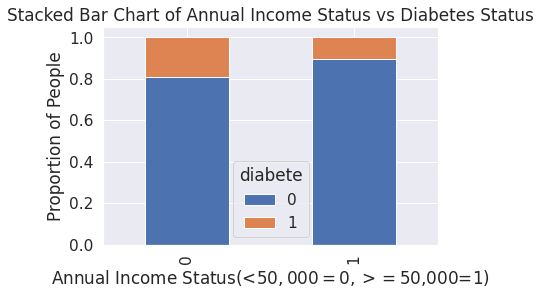

In [36]:
# Stacked Bar Chart of Annual Income Status vs Diabetes Status
table=pd.crosstab(df.incom50,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Annual Income Status vs Diabetes Status')
plt.xlabel('Annual Income Status(<$50,000=0, >=$50,000=1)')
plt.ylabel('Proportion of People')
plt.show()

In [37]:
# The independent variable, cllgr, categorical
df['cllgr'].describe()

count    211319.000000
mean          0.469906
std           0.499095
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: cllgr, dtype: float64

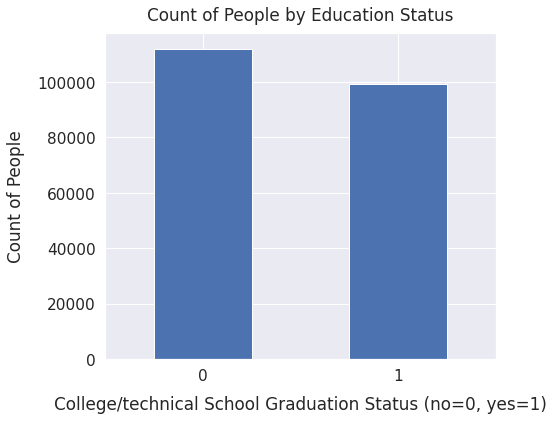

In [38]:
# the distribution of cllgr
df['cllgr'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('College/technical School Graduation Status (no=0, yes=1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Education Status', y=1.02);

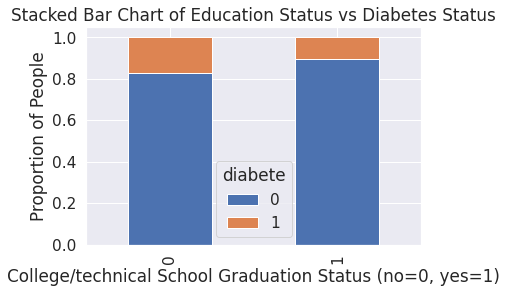

In [39]:
# Stacked Bar Chart of Education Status vs Diabetes Status
table=pd.crosstab(df.cllgr,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education Status vs Diabetes Status')
plt.xlabel('College/technical School Graduation Status (no=0, yes=1)')
plt.ylabel('Proportion of People')
plt.show()

In [40]:
# The independent variable, sex, categorical
df['sex'].describe()

count    211319.000000
mean          0.529815
std           0.499111
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: sex, dtype: float64

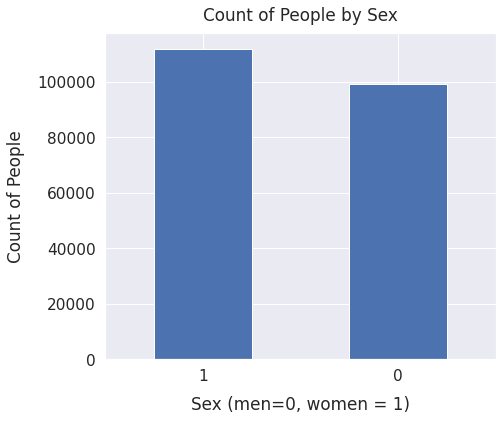

In [41]:
# the distribution of sex
df['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Sex (men=0, women = 1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Sex', y=1.02);

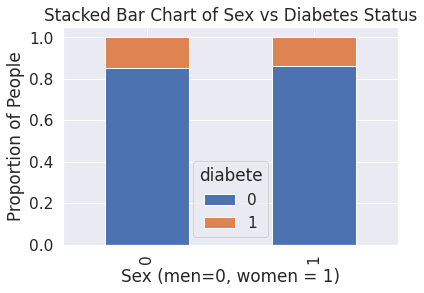

In [42]:
# Stacked Bar Chart of Sex vs Diabetes Status
table=pd.crosstab(df.sex,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sex vs Diabetes Status')
plt.xlabel('Sex (men=0, women = 1)')
plt.ylabel('Proportion of People')
plt.show()

In [43]:
# The independent variable, age65, categorical
df['age65'].describe()

count    211319.000000
mean          0.340523
std           0.473886
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: age65, dtype: float64

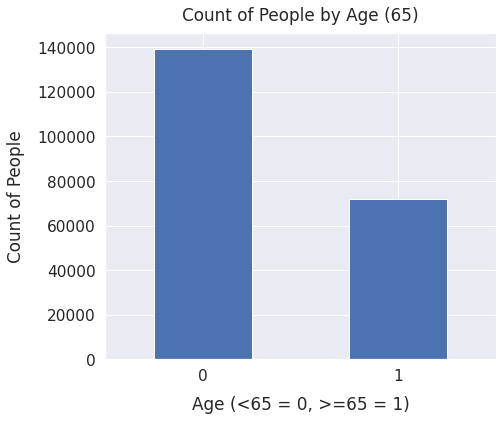

In [44]:
# the distribution of age65
df['age65'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Age (<65 = 0, >=65 = 1)', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.title('Count of People by Age (65)', y=1.02);

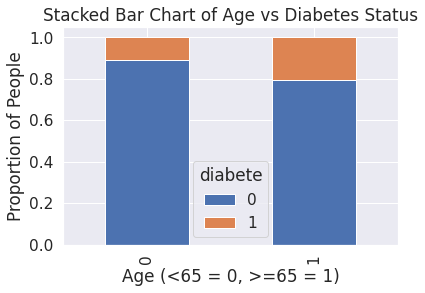

In [45]:
# Stacked Bar Chart of Age vs Diabetes Status
table=pd.crosstab(df.age65,df.diabete)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Diabetes Status')
plt.xlabel('Age (<65 = 0, >=65 = 1)')
plt.ylabel('Proportion of People')
plt.show()

------------------